In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
import scipy.ndimage as scn

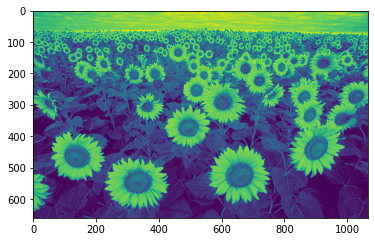

In [187]:

img = cv2.imread('sunflowers.jpg')
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
plt.imshow(img)


In [131]:
# Exercise 8.1
def gaussian1DKernel(sigma,rule=5,eps=0):
    if eps:
        filter_size=eps
    else:
        filter_size = np.ceil(rule*np.ceil(sigma))
    x_row = np.arange(-filter_size,filter_size+1)
    #g_1 = g_1[:,np.newaxis]
    g = 1/(np.sqrt(2*np.pi*sigma**2))* np.exp((-x_row**2)/(2*sigma**2))
    #gx = -(-x_row**2/(2*sigma**2)) * g
    gx = - x_row / sigma ** 2 * g
    g = g[:,np.newaxis]
    gx = gx[:,np.newaxis]
    return g
    


def scaleSpaced(im,sigma,n):
    radius = np.zeros((n,1))
    im_scales = np.zeros((im.shape[0],im.shape[1],n))
    for i in range(n):
        radius[i] = np.sqrt((sigma*2**i)**2)
        rule = 2**i
        g = gaussian1DKernel(sigma*rule)
        #I = cv2.filter2D(cv2.filter2D(im, -1, g), -1, g.T) 
        I = scn.convolve(scn.convolve(im,g),g.T)
        im_scales[:,:,i] = (I)
    
    return im_scales, radius

img_scales,radius = scaleSpaced(img,3,7)



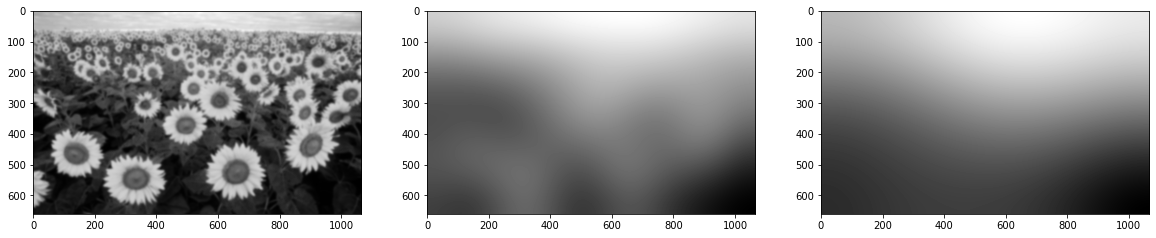

In [132]:
fig = plt.figure(figsize = (20,20))
fig.add_subplot(1,3,1)
plt.imshow(img_scales[:,:,0],cmap='gray')
fig.add_subplot(1,3,2)
plt.imshow(img_scales[:,:,5],cmap='gray')
fig.add_subplot(1,3,3)
plt.imshow(img_scales[:,:,6],cmap='gray')


36.03975486755371


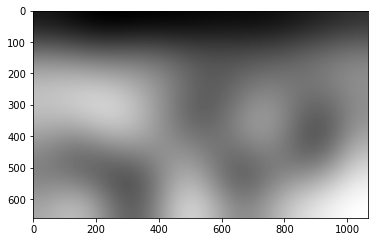

In [133]:
im_diff = img_scales[:,:,6]-img_scales[:,:,5]
print(np.max(im_diff))
plt.imshow(im_diff,cmap='gray')

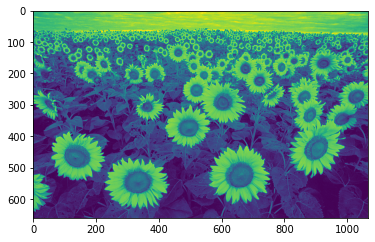

In [123]:
plt.imshow(img)

In [161]:
# Exercise 8.2

def differenceOfGaussian(im,sigma,n):
    DoG = np.zeros((im.shape[0],im.shape[1],n-1))
    img_scales,radius = scaleSpaced(im,sigma,n)
    for i in range(n-1):
        
        I = img_scales[:,:,i-1] - img_scales[:,:,i]
        DoG[:,:,i] = I
    
    return np.array(DoG),radius


In [140]:
DoG = differenceOfGaussian(img,1,10)

In [141]:
print(DoG.shape)

(660, 1066, 9)


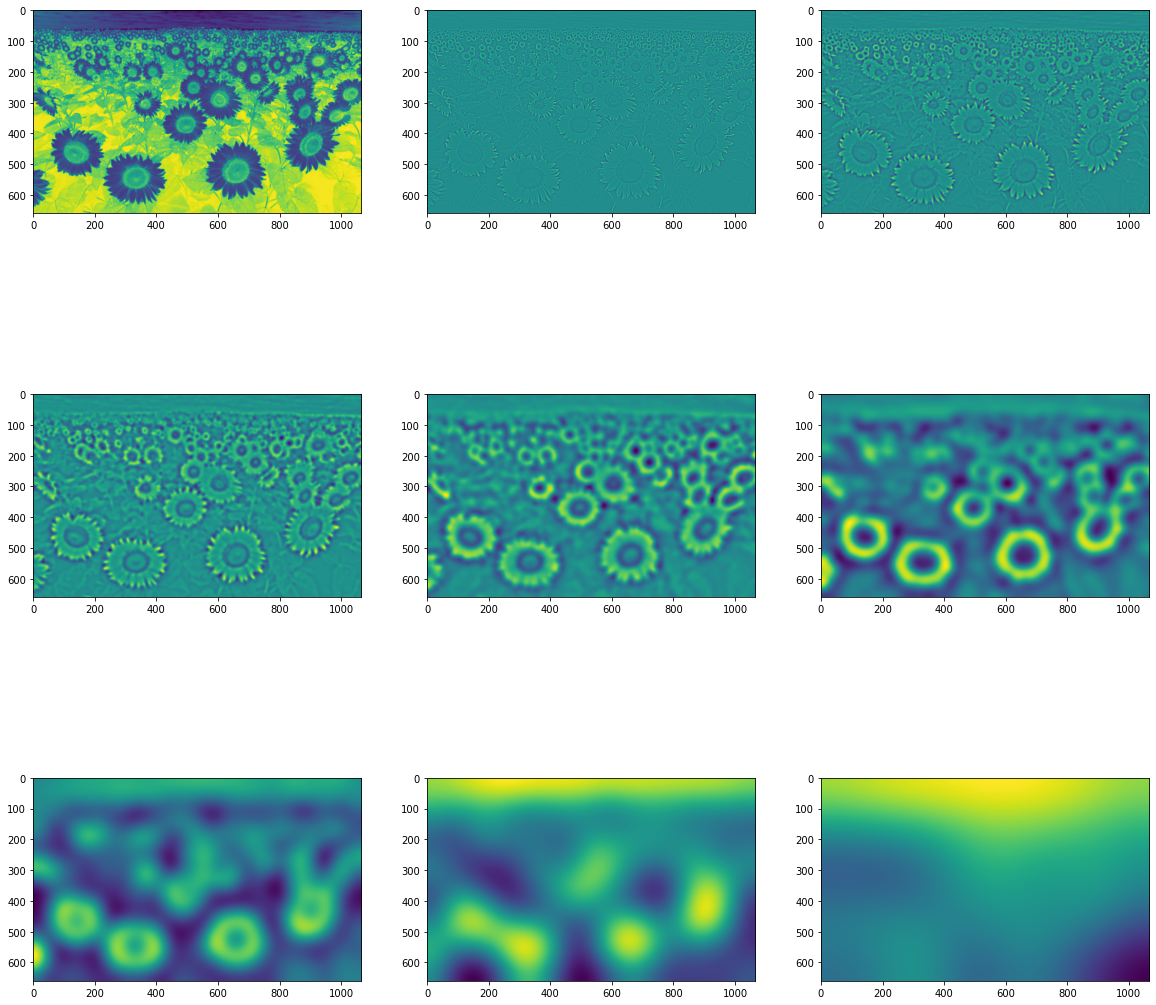

In [142]:
fig = plt.figure(figsize = (20,20))
for i in range(9):
    fig.add_subplot(3,3,i+1)
    plt.imshow(DoG[:,:,i])


In [183]:
# Exercise 8.3
def detectBlobs(im,sigma,n,threshold):
    #DoG = np.abs(differenceOfGaussian(im,sigma,n))
    DoG, radius = differenceOfGaussian(im,sigma,n)
    points_min = peak_local_max(-DoG,min_distance = 1, threshold_abs = threshold)
    points_max = peak_local_max(DoG,min_distance = 1, threshold_abs = threshold)
    blobCoords = np.r_[points_min,points_max]
    return blobCoords.T, DoG, radius
    #blobs = peak_local_max(DoG,min_distance=1, threshold_abs=threshold)
    #return blobs.T
    '''
    blobs=[]
    for i in range(1,DoG.shape[1]-1):
        for j in range(1,DoG.shape[2]-1):
            #in_blob = False
            for k in range(1,DoG.shape[0]-1):
                val = DoG[k,i,j]
                if val > threshold:
                    if (val>np.max(DoG[k-1:k+1,i-1,j-1:j+1])&val>np.max(DoG[k-1:k+1,i+1,j-1:j+1])&
                        val>np.max(DoG[k-1:k+1,i-1:i+1,j-1])&val>np.max(DoG[k-1:k+1,i-1:i+1,j+1])&
                        val>np.max(DoG[k-1,i-1:i+1,j-1:j+1])&val>np.max(DoG[k+1,i-1:i+1,j-1:j+1])):
                        blobs.append(np.array([i,j]))
                 
    
    return np.array(blobs).T
    
    
    '''
    


In [188]:
blobs, DoG, radius = detectBlobs(img,2,8,50)
print(blobs.shape)




(3, 62)


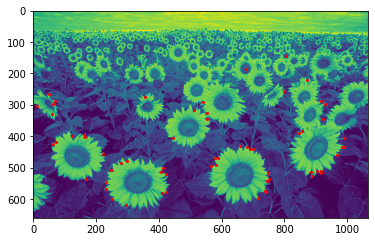

In [189]:

plt.imshow(img)
plt.scatter(blobs[1,:],blobs[0,:],s=4,color='red')
plt.show()

In [13]:
print(img.shape)

(660, 1066)


In [21]:
print(blobs[2,:])

[[  3 206 109]
 [  3 435 398]
 [  3 435 382]
 ...
 [  2 518 748]
 [  2 106  68]
 [  2 237 762]]


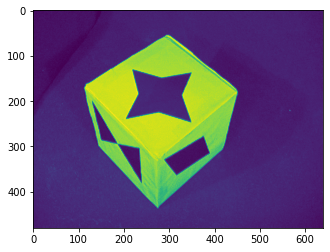

In [17]:
imgbox = cv2.imread('week06_data/Box4.bmp')
imgbox = cv2.cvtColor(imgbox, cv2.COLOR_BGR2GRAY)
plt.imshow(imgbox)

In [18]:
# Exercise 8.4
def transformIm(im,theta,s):
    rows,cols = im.shape
    rot_mat = cv2.getRotationMatrix2D(((cols-1.)/2.,(rows-1.)/2.),theta,s)
    r_im = cv2.warpAffine(im,rot_mat,(cols,rows)) 
    return r_im




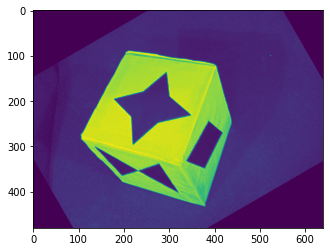

In [19]:
#img2 = cv2.imread('r_im3.jpg')

r_img = transformIm(imgbox,30,1)
plt.imshow(r_img)




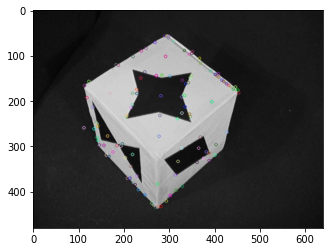

In [20]:
# Exercise 8.5

sift = cv2.SIFT_create() # Sigma of the gaussian at octave 0
kp1, des1 = sift.detectAndCompute(imgbox,None)
img2 = cv2.drawKeypoints(imgbox,kp1,imgbox)
plt.imshow(img2)


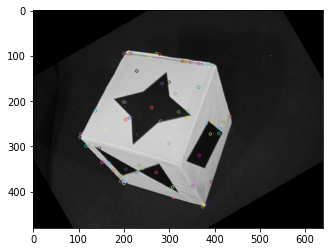

In [21]:

kp2, des2 = sift.detectAndCompute(r_img,None)
r_img2 = cv2.drawKeypoints(r_img,kp2,imgbox)
plt.imshow(r_img2)

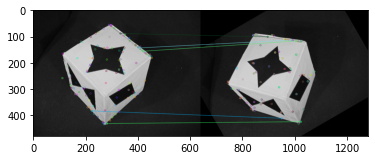

In [22]:
bf = cv2.BFMatcher()

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)


img3 = cv2.drawMatches(imgbox,kp1,r_img2,kp2,matches[:5],None)

plt.imshow(img3)